In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.float_format',lambda x: '%.2f' % x)
sns.set()

In [2]:
raw_data = pd.read_csv(r'mtn_customer_churn.csv')
raw_data

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,CUST0498,Shehu Harris,Jan-25,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,NaN
970,CUST0499,Tega Hood,Mar-25,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,NaN
971,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs
972,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs


In [17]:
data = raw_data.copy()

In [18]:
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

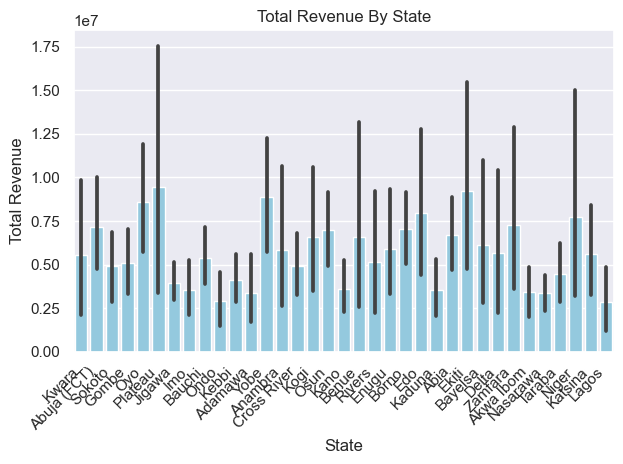

In [19]:
# Total revenue by state
sns.barplot(data=data,x='State',y='Total Revenue',estimator=sum,color='Skyblue')
plt.title('Total Revenue By State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

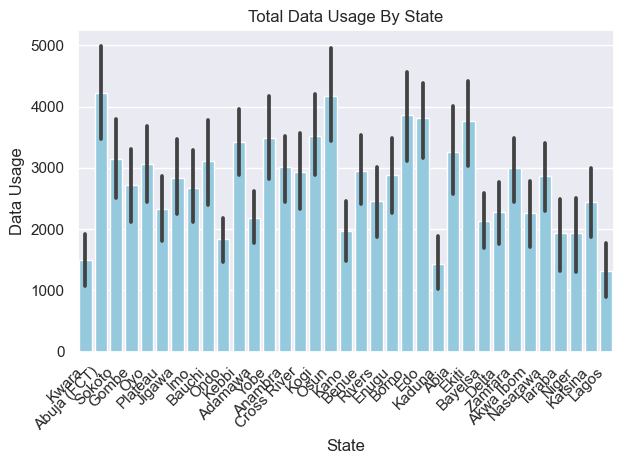

In [37]:
sns.barplot(data=data,x='State',y='Data Usage',estimator=sum,color='Skyblue')
plt.title('Total Data Usage By State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
data['MTN Device'].unique()

array(['4G Router', 'Mobile SIM Card', '5G Broadband Router',
       'Broadband MiFi'], dtype=object)

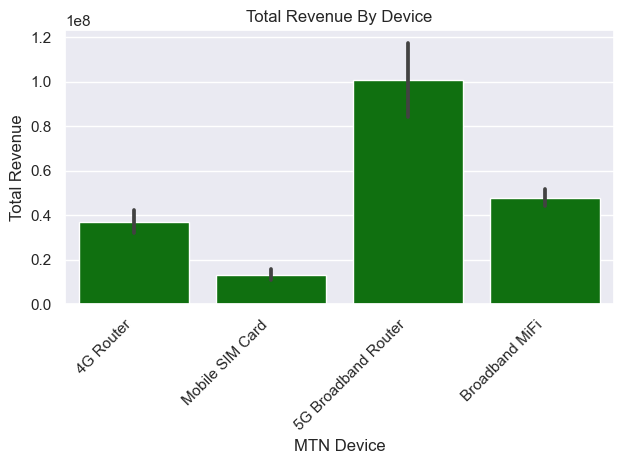

In [21]:
sns.barplot(data=data,x='MTN Device',y='Total Revenue',estimator=sum,color='Green')
plt.title('Total Revenue By Device')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

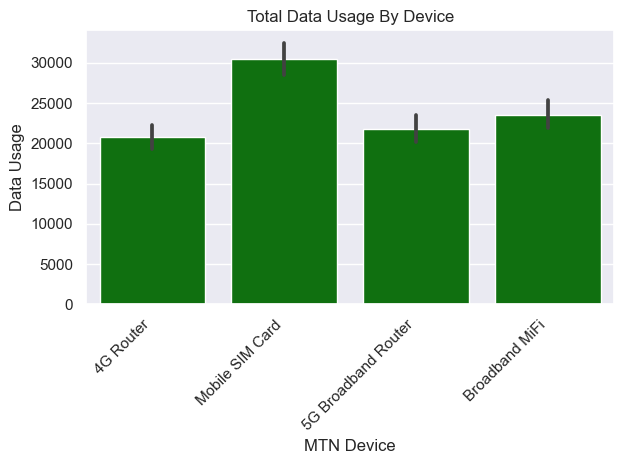

In [36]:
sns.barplot(data=data,x='MTN Device',y='Data Usage',estimator=sum,color='Green')
plt.title('Total Data Usage By Device')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
data['Customer Churn Status'] = data['Customer Churn Status'].astype('category')

In [23]:
encoded_data =  pd.get_dummies(data, columns =['Customer Churn Status'], dtype = int, drop_first=True)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [24]:
encoded_data['Reasons for Churn'] = encoded_data['Reasons for Churn'].fillna('no comment')
encoded_data

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Reasons for Churn,Customer Churn Status_Yes
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Relocation,1
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Better Offers from Competitors,1
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,no comment,0
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,no comment,0
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,no comment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,CUST0498,Shehu Harris,Jan-25,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,no comment,0
970,CUST0499,Tega Hood,Mar-25,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,no comment,0
971,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,High Call Tarriffs,1
972,CUST0500,Oghene Hamilton,Feb-25,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,High Call Tarriffs,1


In [25]:
x = encoded_data.drop(['Customer Churn Status_Yes'], axis = 1)
x_with_dummies = pd.get_dummies(x, dtype=int, drop_first=True)

In [26]:
x_with_dummies

,Age,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer ID_CUST0002,Customer ID_CUST0003,Customer ID_CUST0004,...,Subscription Plan_60GB Monthly Broadband Plan,Subscription Plan_65GB Monthly Plan,Subscription Plan_7GB Monthly Plan,Reasons for Churn_Costly Data Plans,Reasons for Churn_Fast Data Consumption,Reasons for Churn_High Call Tarriffs,Reasons for Churn_Poor Customer Service,Reasons for Churn_Poor Network,Reasons for Churn_Relocation,Reasons for Churn_no comment
0,27,2,2,35000,19,665000,44.48,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,16,2,22,5500,12,66000,19.79,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,1,60,20000,8,160000,9.64,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,21,1,60,500,8,4000,197.05,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,21,1,60,9000,15,135000,76.34,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,72,3,42,9000,7,63000,8.14,0,0,0,...,0,0,0,0,0,0,0,0,0,1
970,41,2,20,9000,10,90000,154.13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
971,67,4,31,35000,15,525000,144.64,0,0,0,...,0,0,0,0,0,1,0,0,0,0
972,67,4,31,3500,11,38500,158.49,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [32]:
# Parseing date
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], format='%b-%y')
data

,Customer ID,Full Name,Date of Purchase,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Total Revenue,Data Usage,Customer Churn Status,Reasons for Churn
0,CUST0001,Ngozi Berry,2025-01-01,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,2025-03-01,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,2025-03-01,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,CUST0498,Shehu Harris,2025-01-01,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,NaN
970,CUST0499,Tega Hood,2025-03-01,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,NaN
971,CUST0500,Oghene Hamilton,2025-02-01,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs
972,CUST0500,Oghene Hamilton,2025-02-01,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs


In [30]:
data.columns

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

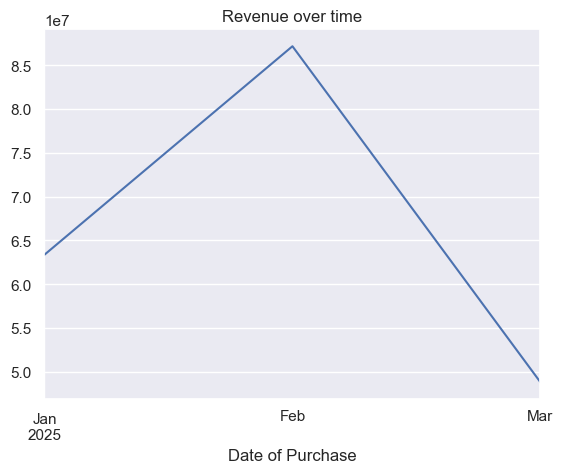

In [45]:
data.set_index('Date of Purchase').resample('M')['Total Revenue'].sum().plot()
plt.title('Revenue over time')
plt.show()

In [60]:
user_revenue = data.groupby('Customer ID')['Total Revenue'].sum()

median_revenue = user_revenue.median()
print(f'Median Revenue per User:{median_revenue}')

Median Revenue per User:282250.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Revenue per user')

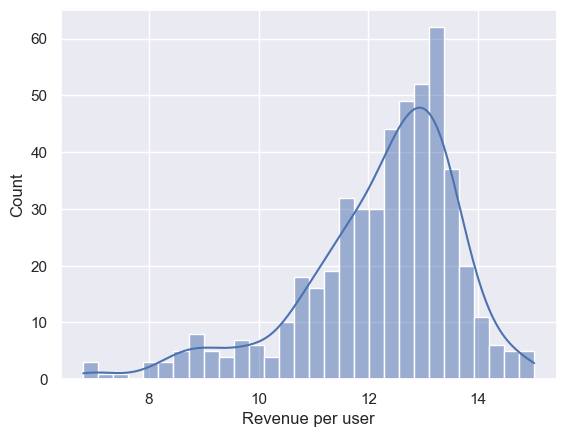

In [62]:
sns.histplot(user_revenue.apply(lambda x: np.log1p(x)),bins=30,kde=True)
plt.xlabel('Revenue per user')

In [63]:
#Customer lifetime Value


user_span = data.groupby('Customer ID')['Date of Purchase'].agg(['min', 'max'])

user_stats = user_span.join(user_revenue)
user_stats

,min,max,Total Revenue
Customer ID,,,
CUST0001,2025-01-01,2025-01-01,665000
CUST0002,2025-03-01,2025-03-01,66000
CUST0003,2025-03-01,2025-03-01,299000
CUST0004,2025-03-01,2025-03-01,40500
CUST0005,2025-01-01,2025-01-01,144000
...,...,...,...
CUST0496,2025-01-01,2025-01-01,65700
CUST0497,2025-01-01,2025-01-01,788000
CUST0498,2025-01-01,2025-01-01,123000


In [65]:
data.columns

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

In [66]:
data = data.drop(['Customer ID','Full Name','Date of Purchase','Total Revenue'], axis=1)

In [68]:
data.to_csv(r'C:\Users\JKLL\Desktop\Projects\MTN\Cleaned Data.csv', drop_index=True)

### Check for correlation and use heatmaps next